In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [2]:
# Read CSV file
df_kidney = pd.read_csv('kidney_disease.csv')

In [3]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df_kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# Check missing values for the filed Classification is checked
df_kidney[df_kidney['classification']=='ckd'].isnull().sum()


id                  0
age                 8
bp                 10
sg                 42
al                 41
su                 44
rbc               143
pc                 56
pcc                 0
ba                  0
bgr                38
bu                 13
sc                 12
sod                82
pot                83
hemo               46
pcv                66
wc                 98
rc                123
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [7]:
# Check missing values for the filed Classification is checked
df_kidney[df_kidney['classification']=='notckd'].isnull().sum()

id                0
age               1
bp                2
sg                5
al                5
su                5
rbc               9
pc                9
pcc               4
ba                4
bgr               6
bu                6
sc                5
sod               5
pot               5
hemo              6
pcv               4
wc                7
rc                7
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [8]:
# rename column names to make it more user-friendly

df_kidney.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
#Handling missing values
df_kidney.fillna(method='ffill', inplace=True)

C:\Users\kichu\AppData\Local\Temp\ipykernel_22012\2565629508.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_kidney.fillna(method='ffill', inplace=True)


In [10]:
# Check missing values again
df_kidney.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            2
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     3
potassium                  3
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [11]:
#Drop missing values
df_kidney.dropna(inplace=True)

In [12]:
# Check missing values again
df_kidney.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [13]:
df_kidney.drop(['id'], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

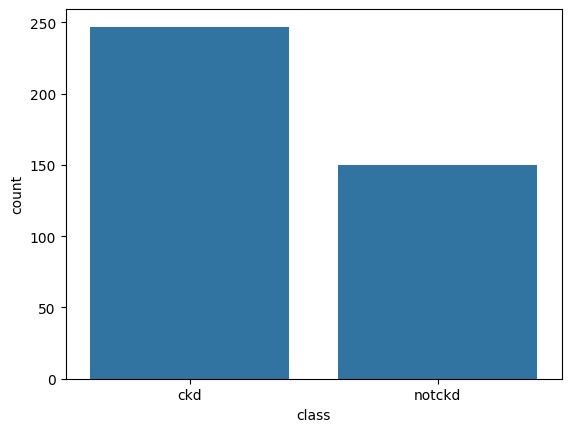

In [14]:
#Status of patients
sns.countplot(x='class', data=df_kidney)

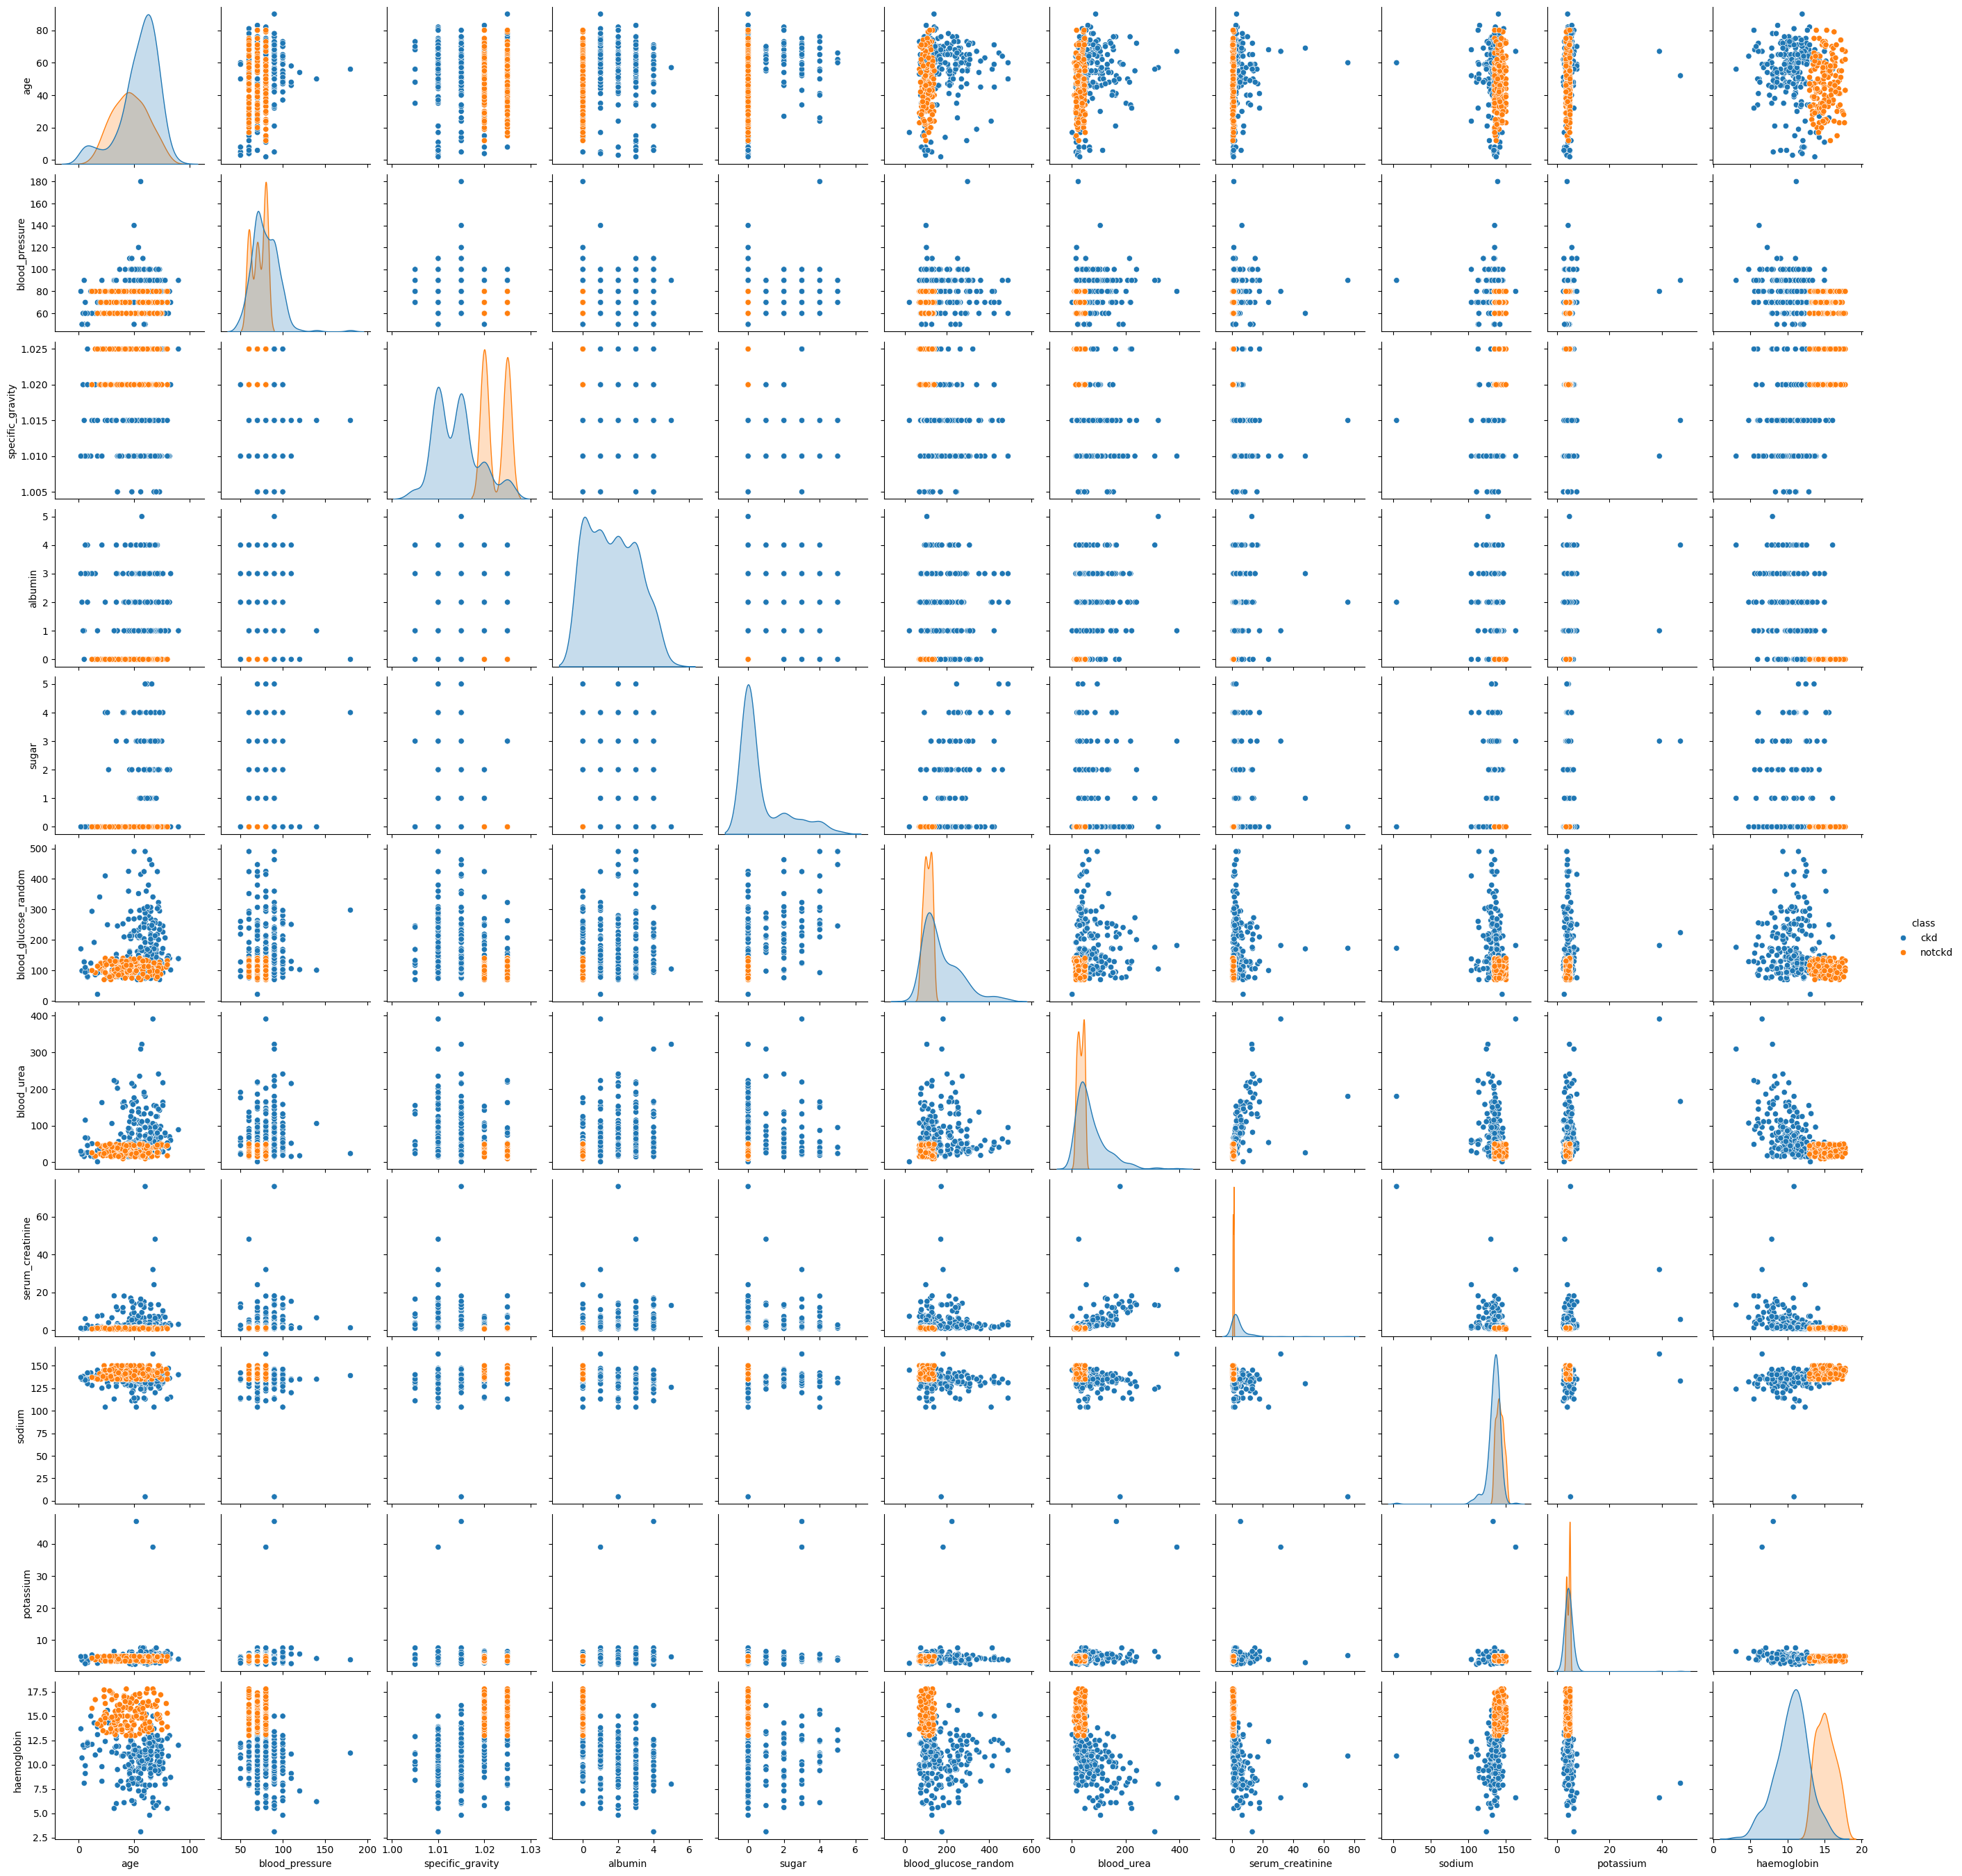

In [15]:
# checking numerical features distribution
sns.pairplot(df_kidney, hue='class')

In [16]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_kidney.columns if df_kidney[col].dtype == 'object']
num_cols = [col for col in df_kidney.columns if df_kidney[col].dtype != 'object']

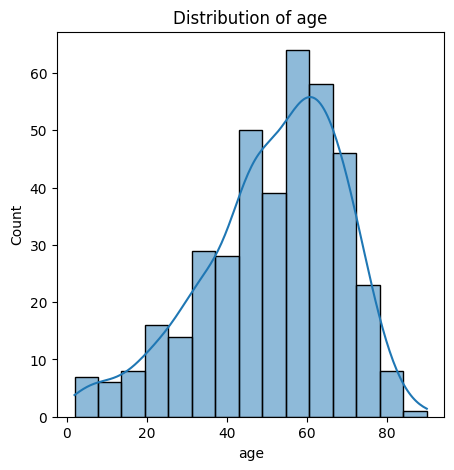

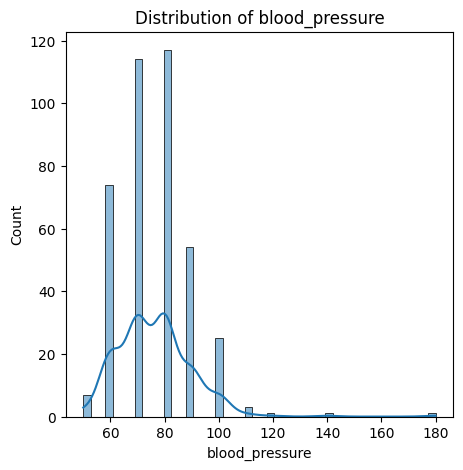

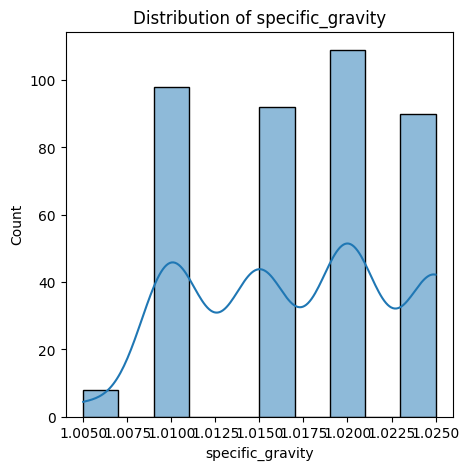

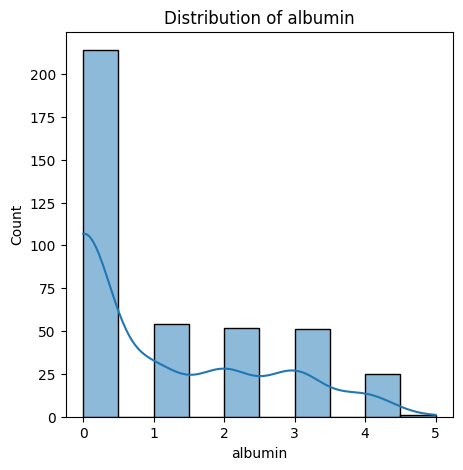

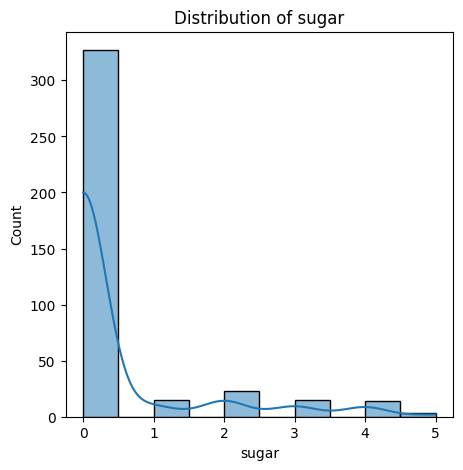

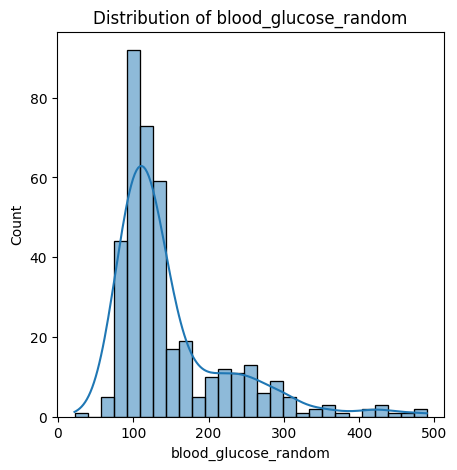

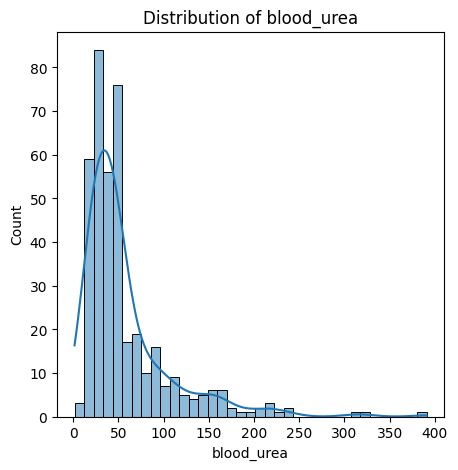

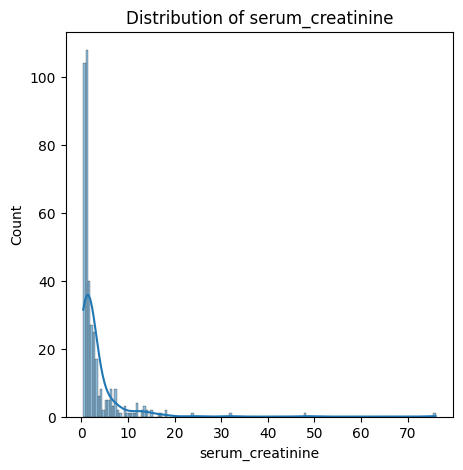

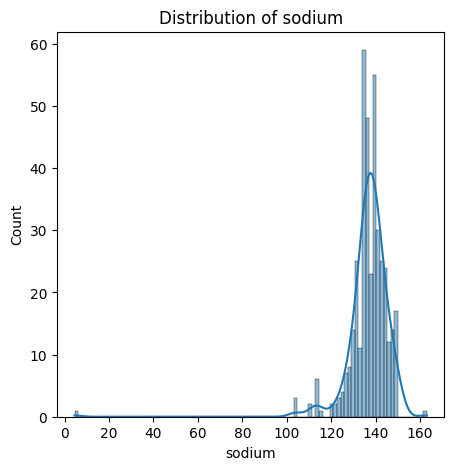

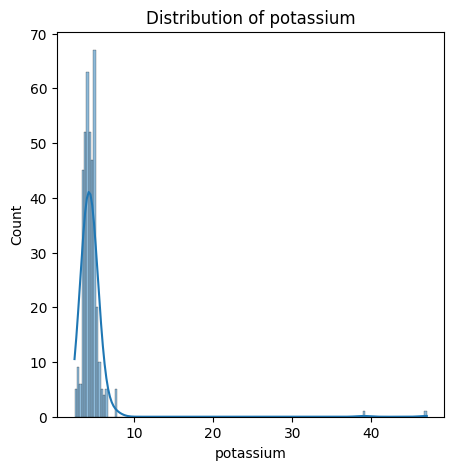

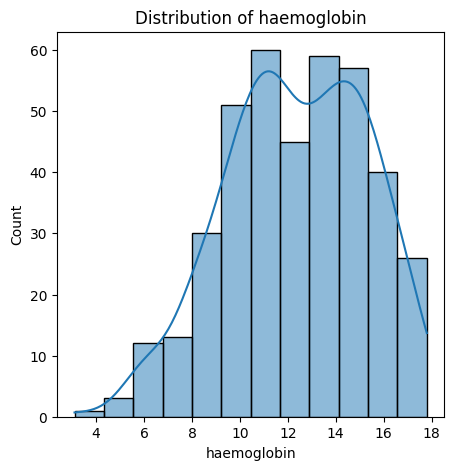

In [17]:
# checking numerical features distribution
for col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(df_kidney[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

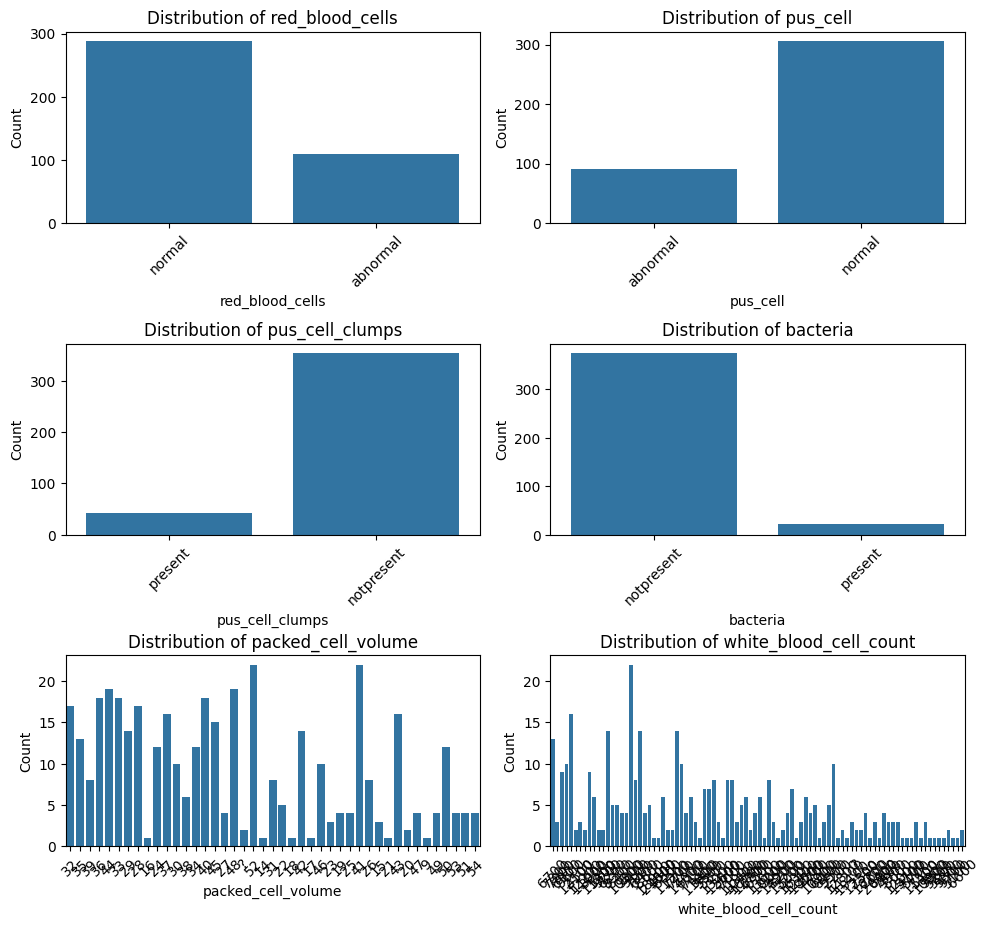

In [19]:
# checking categorical features distribution
plt.figure(figsize=(10, 10))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(x=column, data=df_kidney, ax=ax)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
    plotnumber += 1
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [20]:
#Conver categorical columns to numerical using label encoding

le = LabelEncoder()
# Apply label encoding to categorical columns
for col in cat_cols:
    df_kidney[col] = le.fit_transform(df_kidney[col])
# Check the data types after encoding
df_kidney.dtypes


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume           int64
white_blood_cell_count       int64
red_blood_cell_count         int64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
appetite                     int64
peda_edema                   int64
aanemia                      int64
class                        int64
dtype: object

In [21]:
df_kidney.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,18,59,17,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,21,65,24,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,25,69,22,1,1,0,0,1,0,0
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,22,69,22,0,0,0,0,0,0,0
7,24.0,70.0,1.015,2.0,4.0,1,0,0,0,410.0,...,30,61,28,0,1,0,0,1,0,0


In [43]:
#Write the preprocessed data to a new CSV file
df_kidney.to_csv('kidney_disease_preprocessed.csv', index=False)

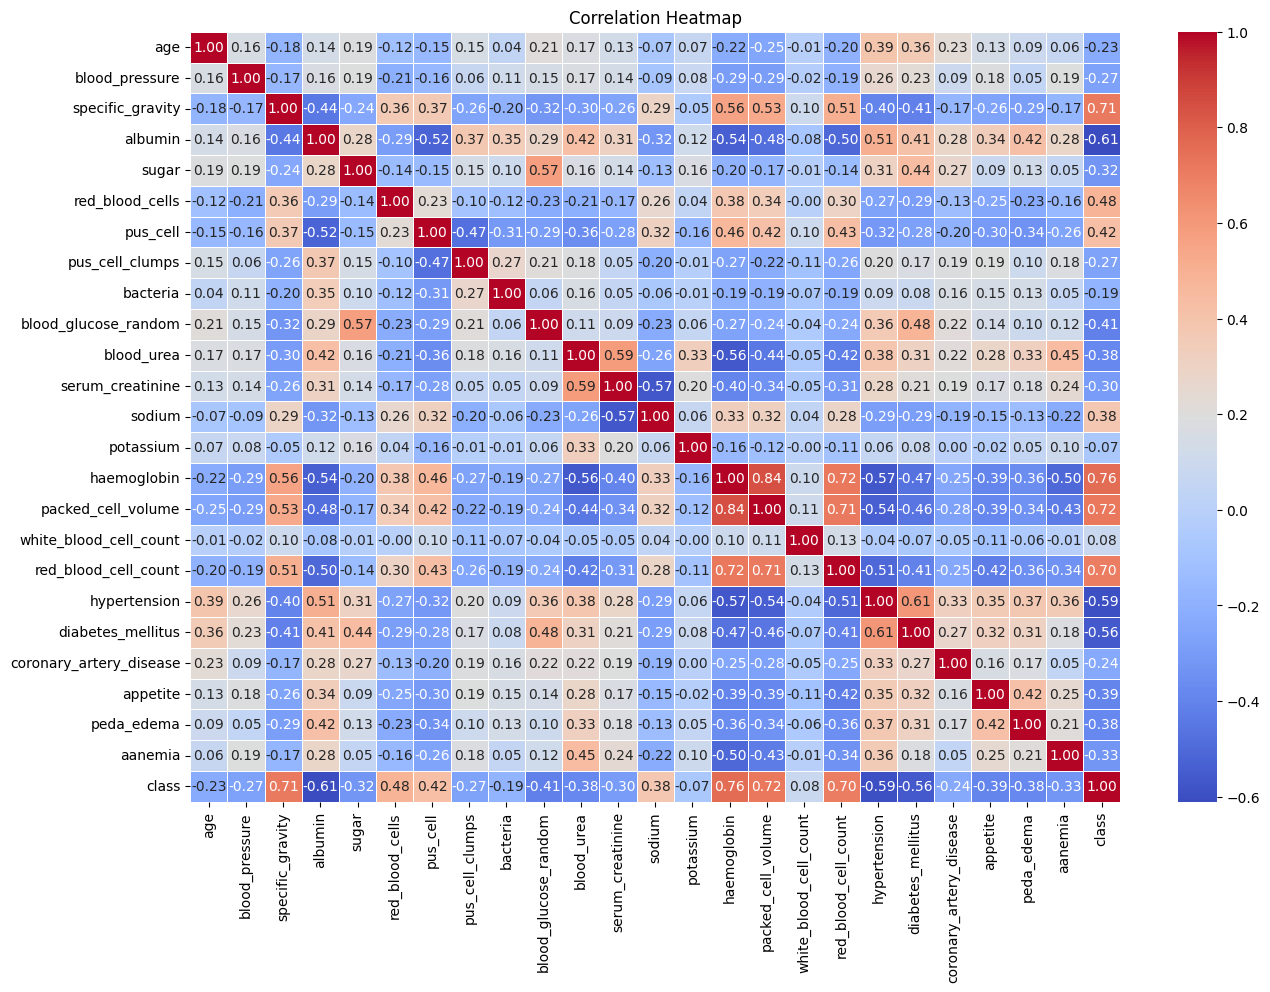

In [22]:
#Heatmap to check correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df_kidney.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)   
plt.title('Correlation Heatmap')
plt.show()

In [41]:
#Create Model




X = df_kidney[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria','sodium','potassium', 'haemoglobin']]
y = df_kidney['class']  # Target variable

rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)
#Logic Regression

# #Normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)
# Evaluate the model
y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log:.2f}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log))
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))
#MSE

mse_log = mean_squared_error(y_test, y_pred_log)
print(f'Logistic Regression Mean Squared Error: {mse_log:.2f}')
#MAE

mae_log = mean_absolute_error(y_test, y_pred_log)
print(f'Logistic Regression Mean Absolute Error: {mae_log:.2f}')
#RMSE
rmse_log = np.sqrt(mse_log)
print(f'Logistic Regression Root Mean Squared Error: {rmse_log:.2f}')





Logistic Regression Accuracy: 0.94
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.93      0.95      0.94        43

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

Logistic Regression Confusion Matrix:
[[44  3]
 [ 2 41]]
Logistic Regression Mean Squared Error: 0.06
Logistic Regression Mean Absolute Error: 0.06
Logistic Regression Root Mean Squared Error: 0.24


In [42]:
#Save the model
joblib.dump(log_model, 'kidney_model.pkl')

['kidney_model.pkl']